# SENG 474 Project - Fall 2019

Mai Mahmoud Ibraheam (V00947787)

Vivek Sharma (V00904236)

For the project of Seng474, we will be analyzing a dataset we obtained from Kaggle. The dataset contains data on 17000 App store games. We want to analyze the data using the methods learnt in this class and try to draw same conclusions or discover patterns from this data. We also plan on creating various models using the algorithms learnt in this class to predict some of the attributes in the data. We will compare various models to see how they perform and will then try to improve their performance using techniques like regularization. We're using **Python, Numpy, Pandas, Matplotlib, and Pandas** in this notebook.

## Problem Background

With the launch of smartphone platforms, many new revenue sources were created and many old ones were revolutionized. New economies of apps and games were created for mobile devices and they now account for an estimated 120 billion dollars in revenue [1]. These markets are growing very fast with Sensor Tower predicting that the the app market sales will grow by a compound annual growth rate (CAGR) of 17% of by 2023 to reach $156 billion dollars [1]. This presents a big oppurtunity for the developers of the apps and games on the mobile platforms. 

There are 2 main mobile platform app stores today:

1.   Apple App Store on iOS
2.   Google Play Store on Web

The app store format is in the form of a digital market place. The developers create an account on these digital marketplaces and then publish their apps and games there. Each app store has thousands of apps and games in various categories so to provide consumers a way of knowing the experiences of others with an app, the app stores implement a rating scheme. Each app/game is rated on a 1-5 scale withe 1 reflecting lowest and 5 reflecting highest rated app/game. The app stores then use these ratings along with various other metrics to move an app/game up or down in a list while showing it to the users. The users also mentally consider the apps rated higher to be superior before installing them. Hence the app ratings of can make or break the sales of an app. The developers spend thousands of hours in developing an app and their sales depend directly on these ratings. 

In this project, we aim to discover patterns which saperate high rated apps from low rated apps. We aim to discover if there are factors other than the content of the app which can lead to a higher rating in the app store or not. The dataset we're using to study this problem comes from Kaggle and is called 17k mobile starategy games. The dataset contains data of 17007 mobile strategy games and some apps from the Apple App Store [2]. According to the publisher, it was collected in August 2019 using the iTunes API and App Store Sitemap.

Disovering patterns among the highly rated and lowly rated apps can be a valuable information for the developers of these apps who can use this information in the future to design apps in a way that they can get higher app ratings. This becomes especially important for development teams with small budgets since they often have lesser budgets and hence they can use this information to aim their resources more towards these key areas.  



## 1.0 Data Exploration

In this step, we analyze the data to get familiar with it. Exploring the data is the first and one of the most important step in a data science problem. By observing relationships in the data during data exploration, it can deliver some initial insights which can guide the later process of developing the models. The dataset used for this project has been stored in Google Drive so as to prevent uploading it again and again since this notebook was prepared in Google Colab. We use Google Drive's functions to bring data into our notebook. The data is in a csv format, so we first load it as a Pandas Dataframe. Pandas is a data manipulation library in Python which treats the data as series and dataframes similar to rows and tables and has various data manipulation and plotting capabilities built into it.

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#dataset_path = '/content/drive/My Drive/appstore_games.csv'
dataset_path = 'appstore_games.csv'

In [0]:
import pandas as pd

In [0]:
# Don't truncate data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
data = pd.read_csv(dataset_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

### 1.1 Deal with missing entries

We notice that the dataset has 17007 rows and has 18 columns for various attributes. On looking at the summary for columns, we can see that some of the columns don't have 17007 entries which means that the data in them is missing for some of the rows. We now inspect the rows which are having null entries to see the missing attributes in them. We do this so that we can make some conclusions on the quality of this data. To deal with the missing data, we can do various things depending upon the type of the data it represents. Most of the steps which can be taken to deal with missing data involve guessing the best candidates of entries which can be filled in place of the missing data. An example here could be that for a dataset on average heights of a plant, if we see that we're missing some of the entries and it can cause us problems, we can adopt a strategy like replacing the missing entries by average of that attribute or replacing the entries with the nearest value of that attribute and so on.

We notice that the data is missing subtitles, this can be because the app doesn't have a subtitle and may not impact our data quality as much. Since we won't be using Subtitle later in this notebook, we remove it to reduce effort to deal with missing data for Subtitle column.

We also notice that we're missing many of the values for average user rating, user ratings count, Price, In-app Purchases and Languages. One of the goals of this project is to create a model which can help us deduce if there's a correlation between average rating and the price of the app or a correlation among various other attributes here. The missing values in these cases will pose us a challenge. So from here on, we create 2 datasets:



1.   A dataset with all the rows containing null entries removed
2.   A dataset with the rows containing null entries replaced by non-null entries.

We will then also compare if doing the latter helped us improve our prediction performance or not.



In [0]:
print(data[data['Subtitle'].isnull()].head())

                                                 URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.9

In [0]:
del data['Subtitle']

In [0]:
data_filled=data.copy()

In [0]:
data_filled['Average User Rating'].fillna(data['Average User Rating'].mean(), inplace=True)
data_filled['User Rating Count'].fillna(data['User Rating Count'].mean(), inplace=True)
data_filled['In-app Purchases'].fillna(0, inplace=True)
data_filled['Price'].fillna(0, inplace=True)
data_filled['Languages'].fillna(1, inplace=True)
data_filled['Size'].fillna(data['Size'].mean(), inplace=True)

In [0]:
data = data.dropna(how='any',axis=0) 

In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 5 to 16932
Data columns (total 17 columns):
URL                             4618 non-null object
ID                              4618 non-null int64
Name                            4618 non-null object
Icon URL                        4618 non-null object
Average User Rating             4618 non-null float64
User Rating Count               4618 non-null float64
Price                           4618 non-null float64
In-app Purchases                4618 non-null object
Description                     4618 non-null object
Developer                       4618 non-null object
Age Rating                      4618 non-null object
Languages                       4618 non-null object
Size                            4618 non-null float64
Primary Genre                   4618 non-null object
Genres                          4618 non-null object
Original Release Date           4618 non-null object
Current Version Release Date    4618 non-

In [0]:
print(data_filled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 17 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                17007 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       17007 non-null object
Size                            17007 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date           17007 non-null object
Current Version Release 

So now we have 2 datasets:



1.   data - all null entries are replaced with non null values
2.   data_filled - all rows with null entries are removed



### 1.2 Exploratory Data Analysis using Matplotlib and Pandas

In this section, we try to learn some basic chatacteristics of the data by plotting graphs using Matplotlib. This will give us a better sense of the datasets we have.

In [0]:
import matplotlib.pyplot as plt

Let's start by plotting Price, Size, Age Rating, User Ratings Count against the Average User Rating of an App to see if there is a correlation between any of them. Information gathered from this step will be used later in creating a model which predicts the rating of an app using these factors.

#### 1.2.1 Price to Average User Ratings

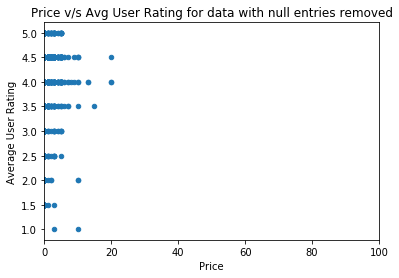

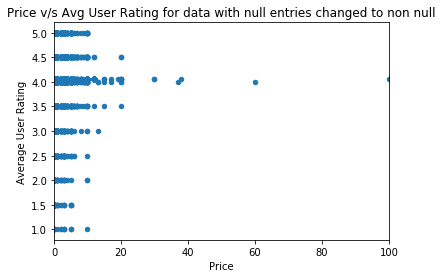

In [0]:
data.plot(kind='scatter', x='Price',  y='Average User Rating', xlim=(0, 100), title='Price v/s Avg User Rating for data with null entries removed')
data_filled.plot(kind='scatter', x='Price',  y='Average User Rating', xlim=(0, 100), title='Price v/s Avg User Rating for data with null entries changed to non null')

As we can see from the plots above, most of the Apps having a rating of 3 or higher tend to be less than $10 in price. There was no app having a perfect rating of 5 which had of price of over 16 dollars in the case where we removed the rows containing null entries. In the case where we did have did some feature engineering to replace the null entries by some manner, we still observe the same pattern however due to the noise introduced by feature engineering, apps having 5 start reviews tend to be priced lesser than 18 dollars. We also that apps over the 20 dollars price tend to recive a review rating of 4 or higher. This may signal the fact that more expensive apps tend to be rated higher and hence tend to be of a higher quality. 

We notice that the feature engineered data has some artifacts introduced into it. So in this case, the mean price may not be the best strategy for dealing with null entries. We will stick with it for no until we test the performance with other attributes as well.

#### 1.2.2 User Ratings Count to Average User Ratings

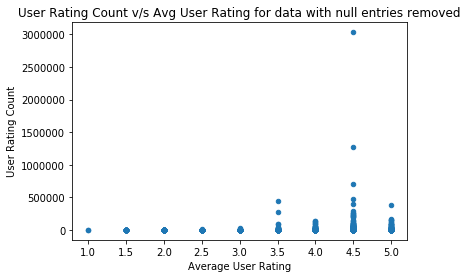

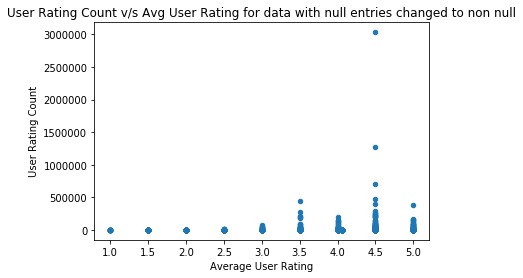

In [0]:
data.plot(y='User Rating Count', x='Average User Rating', kind='scatter', title='User Rating Count v/s Avg User Rating for data with null entries removed')
data_filled.plot(y='User Rating Count', x='Average User Rating', kind='scatter', title='User Rating Count v/s Avg User Rating for data with null entries changed to non null')

If an App has a low number of ratings, it is possible that the extreme values in those ratings may dominate the rest of the ratings. As the number of ratings increase, the dominance of the edge cases will tend to disappear. So we expect the apps to be having a large number of ratings to have their average rating not be on one of the extremes and be somewhere in between them. As we can see from the charts above, apps with a 0 or 5 rating tend to have lower than 50,000 ratings. Apps with a higher number of ratings than that are rated 4. 

We also hypothesize that apps with higher number of ratings should also have a higher average rating. This could be attributed to the fact that more number of ratings would signal towards more users using that app which can be directly linked to that app being of a higher quality in some regard and hence a higher rating. As we can see from the chart above, this correlation seems to hold for this dataset. All apps with more than 20,000 ratings are rated 3.5 or higher. The apps with the highest number of ratings have an average rating of 4.5.

In this case, there isn't much difference between the data with null entries removed and the data with null entries replaced with non null entries signalling our choice in this case to be good. A benefit to the second case is that we get more data on the non null attributes to work with.

#### 1.2.3 Size vs Average User Rating

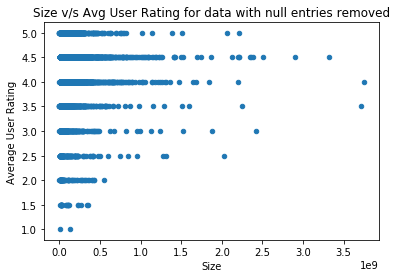

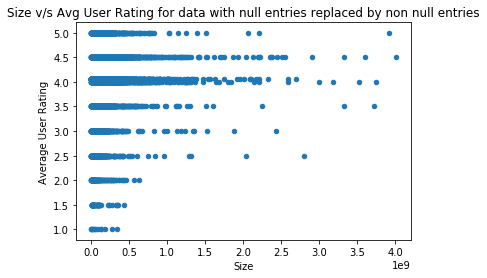

In [0]:
data.plot(x='Size', y='Average User Rating', kind='scatter', title='Size v/s Avg User Rating for data with null entries removed')
data_filled.plot(x='Size', y='Average User Rating', kind='scatter' ,title='Size v/s Avg User Rating for data with null entries replaced by non null entries')

We hypothesize that apps which are bigger in size should receive a lower rating because the user will have to spend more mobile data to download it, it will take more of his storage on his device and and it will also take him longer to download and install thus leading to a sub-optimal experience. 

The data however doesn't support our hypothesis. On an adjusted basis by size, no app bigger than 0.8 size units received a rating of 2 or lower. In fact the apps which are of the biggest size received a rating of 4 or 5. This can be due to the fact that the bigger apps by size should have more content in them and since in this case, most of our apps are games, bigger games might be more engaging for the users. 

The feature engineering we did didn't seem to change data by much. This is an expected outcome since we only reduced the entries and size as an attribute wasn't having any null entries before.

#### 1.2.4 Genre vs Average Rating

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text xticklabel objects>)

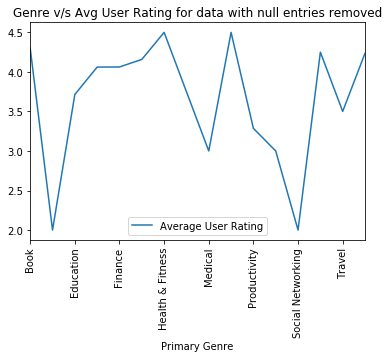

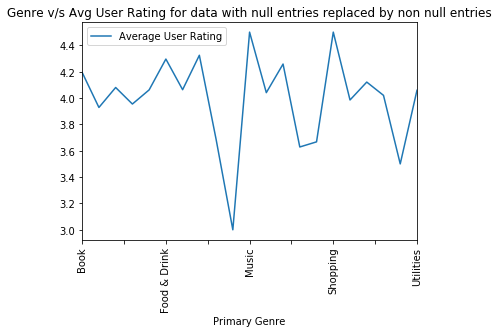

In [0]:
groups1 = data.groupby(['Primary Genre']).mean()
groups1.plot(y='Average User Rating', title='Genre v/s Avg User Rating for data with null entries removed')
plt.xticks(rotation=90)
groups2 = data_filled.groupby(['Primary Genre']).mean()
groups2.plot(y='Average User Rating', title='Genre v/s Avg User Rating for data with null entries replaced by non null entries')
plt.xticks(rotation=90)

We expected that different genres will have different average ratings. We grouped the data by Genre and then plotted it against Average User rating. By making this plot, we made some interesting conclusions about the data. Firtly, apps from Education and Social Media genres seem to do very poorly in terms of reviews. This can mean a lackage of money spent on apps from these categories and hence we can conclude that companies making apps in these categories need to invest more in their apps. Apps from Health and Fitness genre are doing really good in terms of average ratings receiving overall the highest ratings throughout. Medical apps receive at an average a rating of 3 in the data with removed null entries. These apps can be improved as well.

####1.2.5 Price vs Average User Rating

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

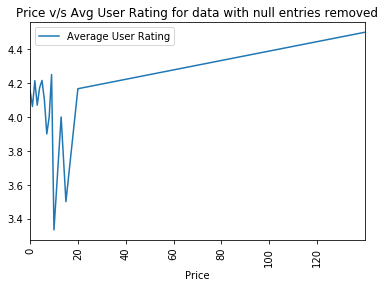

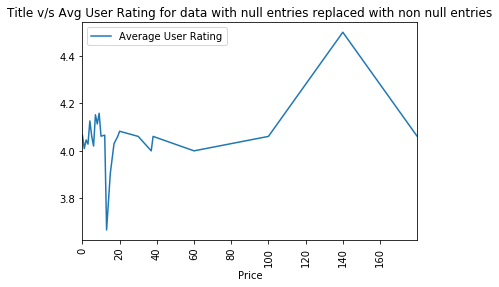

In [0]:
groups1 = data.groupby(['Price']).mean()
groups1.plot(y='Average User Rating', title='Price v/s Avg User Rating for data with null entries removed')
plt.xticks(rotation=90)
groups2 = data_filled.groupby(['Price']).mean()
groups2.plot(y='Average User Rating', title='Title v/s Avg User Rating for data with null entries replaced with non null entries')
plt.xticks(rotation=90)

As we can see from the figure above, the ratings fluctuate for apps with price lower than 20 dollars. But once the app crosses the 20 dollar threshold, the ratings of the app increases linearly with an increase in price. Apps with the highest price have the highest rating as well. This it can be concluded that once the price of the app increases 20 dollars, the quality of an app increases linearly with an increase in price. We can also notice that apps priced around 10 dollars seem to receive the lowest ratings. 

By looking at the second map, we also notice that replacing the null entries with non null entries introduced a lot of noise in the dataset. This may mean that replacing rows having a null entry for price with the average price might not have been the best solution in this case.

####1.2.6 Price v/s the Size of the App

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

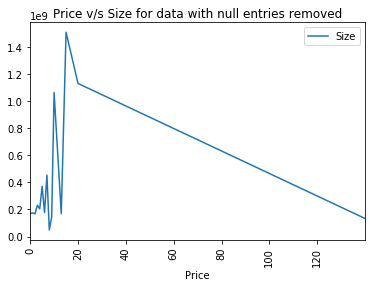

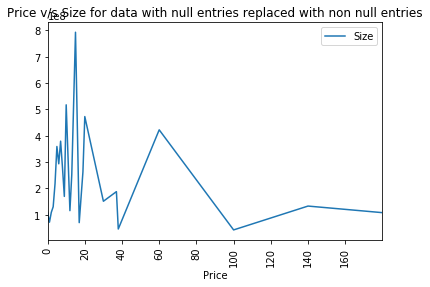

In [0]:
groups1 = data.groupby(['Price']).mean()
groups1.plot(y='Size', title='Price v/s Size for data with null entries removed')
plt.xticks(rotation=90)
groups2 = data_filled.groupby(['Price']).mean()
groups2.plot(y='Size', title='Price v/s Size for data with null entries replaced with non null entries')
plt.xticks(rotation=90)

One last hypothesis we had was that there could be a relationship between the price and the size of an app as well. With an increase in the price of the app, we may expect the developing company to put more effort into the app's development and thus creating an app lower in size. From the charts, we do observe such a relationship. Once the price of an app increases over 20 dollars, the size of the app decreases linearly with price. Under 20 dollars however, we see some fluctuations in the app size with an increase in size however there seems to be a net increase in the size of the app. 

Again in this case, replacing the null entries with non null entries introduced a lot of noise into our data and the patterns observed in the data with null entries removed were not observed in that data.

##2.0 Data Mining for Classification and Regression

In this section of the report, we aim at creating models which can predict some of the attributes in our data using the other attributes of it. Based on the exploratory data analysis done in the last section, we observed that some of the attributes had a direct correlation for our dataset. Although we didn't plot graphs with multiple attributes against a single attribute in the last section, we expect that using more attributes, we will be able to design models which better capture relationships among the various data attributes. For creating the models, we are using the inbuilt functions from scikit learn. The Genre attribute in our data is not in a binary or integer format so we one-hot encode the values in the genre column so that this can be used as a part of training as well. We one hot encode the genre attribute using the get_dummies function of Pandas.

### 2.1 Models to predict the average app rating using various attrubutes (Regression Problem)

The first model we try to create in this report is a model which can predict the rating of an app. From our last section, we found price, number of user ratings, size, genre seemed to have a correlation with the app ratings. The app ratings are numbers on a continuois range in between 0 and 5. Based on this info, this is a regression problem where our goal would be to predict an app's rating based on the above attributes. This info can be used by app developers to design their apps in a way so as to maximize their app ratings. For this problem, we test various models and will pick the best with the best performance. We are using 75% of our data for training and will use 25% of our data to test our model's performance. We test the performance of all our models on both our datasets, the one with the null entry rows removed and the ones with null entry rows replaced by non null values. For the loss function, we make the choice of mean squared error here as our expected results ore continuous values and using mean squared error across all the models give us a tool to compare of various models on this data.

In [0]:
data_Y = data['Average User Rating']
data_X = data.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)

In [0]:
data_Y_filled = data_filled['Average User Rating']
data_X_filled = data_filled.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X = pd.concat([data_X.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X_filled = pd.concat([data_X_filled.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X_filled['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
print(data_X.keys())
print(data_X_filled.keys())

Index(['User Rating Count', 'Price', 'Size', 'Primary Genre_Book',
       'Primary Genre_Business', 'Primary Genre_Education',
       'Primary Genre_Entertainment', 'Primary Genre_Finance',
       'Primary Genre_Games', 'Primary Genre_Health & Fitness',
       'Primary Genre_Lifestyle', 'Primary Genre_Medical',
       'Primary Genre_News', 'Primary Genre_Productivity',
       'Primary Genre_Reference', 'Primary Genre_Social Networking',
       'Primary Genre_Sports', 'Primary Genre_Travel',
       'Primary Genre_Utilities'],
      dtype='object')
Index(['User Rating Count', 'Price', 'Size', 'Primary Genre_Book',
       'Primary Genre_Business', 'Primary Genre_Education',
       'Primary Genre_Entertainment', 'Primary Genre_Finance',
       'Primary Genre_Food & Drink', 'Primary Genre_Games',
       'Primary Genre_Health & Fitness', 'Primary Genre_Lifestyle',
       'Primary Genre_Medical', 'Primary Genre_Music',
       'Primary Genre_Navigation', 'Primary Genre_News',
       'Primary G

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.25, random_state=42)

In [0]:
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(data_X_filled, data_Y_filled, test_size=0.25, random_state=42)

#### 2.1.1 Decision Trees

We first start with decision trees. Decision Trees can be used for regression problems by making the nodes of the decision tree have numerical values. While making the prediction, if the value of the attribute being evaluated is lower than the value at the node, we can go left, or we can go right if it is higher than the value at that node. We expect decision trees to not perform very well in this case due to their simplicity. As we can see below, we get a very high loss for the data with null entry rows removed. Our loss goes down considerbly for data with null values replaced by non null values decreasing by 41.58%. This shows the strength of having more data while creating models since that gives the model more to learn from. Overall though, decision trees seem to have performed poorly on this regression problem.

In [0]:
from sklearn import tree
import sklearn.metrics as metrics
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
dtree_mse = metrics.mean_squared_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions) 

0.7950216450216451

In [0]:
clf_filled = tree.DecisionTreeRegressor()
clf_filled = clf_filled.fit(X_train_filled, y_train_filled)
predictions = clf_filled.predict(X_test_filled)
dtree_mse_filled = metrics.mean_squared_error(y_test_filled, predictions)
metrics.mean_squared_error(y_test_filled, predictions) 

0.4575812816242726

#### 2.1.2 Linear Regression

We now move onto linear regression. In linear regression, we take the equation y=wx+b where y is the predicted outcome, x is the input data and w and b are parameteres we let the model learn by going over the data. The algorithm starts with random values for w and x and then goes over the data adjusting the values of w and b accordingly so that the predicted values end up being closer to the real outcomes. We expect linear regression to perform better than Decision trees on a given test data. Decision trees tend to overfit on data more than linear regression models and hence may not capture the patterns in it very well.

As we see with our results, we improve the performance of for both our datasets. For the dataset with rows with null entries removed, our performance improves by 43.64% while for the data with null entries replaced by non null entries, our performance goes up by 44.85%. We again notice that having more data with null entries replaced considerably improved the performance of the model with the performance in this case going up by 42.9%.

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
lr_mse = metrics.mean_squared_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions) 

0.44901797648680164

In [0]:
reg = LinearRegression().fit(X_train_filled, y_train_filled)
reg = reg.fit(X_train_filled, y_train_filled)
predictions = reg.predict(X_test_filled)
lr_mse_filled = metrics.mean_squared_error(y_test_filled, predictions)
metrics.mean_squared_error(y_test_filled, predictions) 

0.2569599521235967

#### 2.1.3 Support Vector Machines

We create another model for the problem and this time, we use support vector machines (SVM's). SVM's can be used for regression by taking the distance of the point from the saperation line. On this problem, SVM's perform a little better than the linear regression but the performance difference is very negligible. On this problem, SVM's show a loss which is lower than the one from the linear regression case by 1.3%. Again, in this case, the performance improves significantly when we use data with null entries replaced by non null entries.

In [0]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.7)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
svm_mse=metrics.mean_squared_error(y_test, predictions) 
metrics.mean_squared_error(y_test, predictions) 

0.44401691548177624

In [0]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.7)
clf = clf.fit(X_train_filled, y_train_filled)
predictions = clf.predict(X_test_filled)
svm_mse_filled=metrics.mean_squared_error(y_test_filled, predictions)
metrics.mean_squared_error(y_test_filled, predictions) 

0.2715772586777781

#### 2.1.4 Summary

Below is a graph comparing the performance of the models on all the three models for both the 2 datasets. The plots are for mean square errors for the three models we prepared for the 3 datasets with lower loss being the better. As we can see, decision trees have the highest mean squared loss of the three and the performance is comparable for linear regression and SVM's. The filled data is performing better in all the cases as well

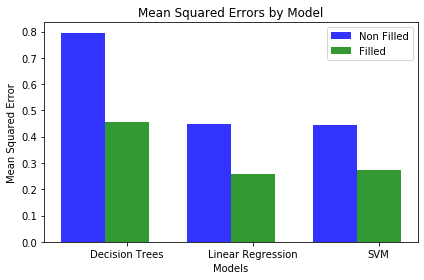

In [0]:
import numpy as np
n_groups = 3
non_filled_performances = (dtree_mse, lr_mse, svm_mse)
filled_performances = (dtree_mse_filled, lr_mse_filled, svm_mse_filled)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, non_filled_performances, bar_width,
alpha=opacity,
color='b',
label='Non Filled')

rects2 = plt.bar(index + bar_width, filled_performances, bar_width,
alpha=opacity,
color='g',
label='Filled')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Errors by Model')
plt.xticks(index + bar_width, ('Decision Trees', 'Linear Regression', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()


### 2.2 Models to predict if the rating of an app will be higher than 3 or not (Classification Problem)

In this section, we now try to use the attributes of an app to see if we can classify an app into a 3 or 3+ rating app and a lesser than 3 rating app. This is a binary classification problem. We again create models for 2 datasets, data which has rows with null entries removed and data which has rows with null entries replaced with non null entries. We use User Ratings count, price, size and the Primary Genre to predict if the app will receive a rating of 3 or higher or not. Since the genre field is a string, we one hot encode it. We use 80% of the data for training and 20% for testing. We then use various metrics including accuracy, precision, confusion matrix, f1 score and also plot the roc curves to compare various models. 

In [0]:
data_Y_2=data['Average User Rating']>=3.0
data_Y_2 = data_Y_2.astype(int)
data_X_2 = data.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)
data_Y_2_filled = data_filled['Average User Rating']>=3.0
data_Y_2_filled = data_Y_2_filled.astype(int)
data_X_2_filled = data_filled.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X_2 = pd.concat([data_X_2.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X_2['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X_2_filled = pd.concat([data_X_2_filled.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X_2_filled['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_X_2, data_Y_2, test_size=0.20, random_state=42)

In [0]:
X_train_2_filled, X_test_2_filled, y_train_2_filled, y_test_2_filled = train_test_split(data_X_2_filled, data_Y_2_filled, test_size=0.20, random_state=42)

#### 2.2.1 Decision Trees

We start with decision trees. Decision trees seem to be performing quite well in most of these metrics. 
 

1.   Accuracy - The model acheives an accuracy of 91.12% on test data with null entries removed and acheives an accuracy of 93.88% on test data with null entries replaced by non null entries.
2. Precision Score - The model scores a precision score of .9521 on test data with rows with null entries removed and a score of .9701 on test data with null entries replaced by non null entries.
3. F1 Score - The model score an F1 score of .9532 on test data with rows with null entries removed and an F1 score of .9683 on test data with null entries replaced by non null entries.
4. Recall Score - The model score an F1 score of .9543 on test data with rows with null entries removed and an F1 score of .9665 on test data with null entries replaced by non null entries.


The confusion matrices and ROC Curves can be seen as below




In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_2, y_train_2)
predictions = clf.predict(X_test_2)

In [0]:
clf_filled = tree.DecisionTreeClassifier()
clf_filled = clf_filled.fit(X_train_2_filled, y_train_2_filled)
predictions_filled = clf_filled.predict(X_test_2_filled) 

##### 2.2.1.1 Accuracy

In [0]:
dtree_accuracy = metrics.accuracy_score(y_test_2, predictions)
dtree_filled_accuracy = metrics.accuracy_score(y_test_2_filled, predictions_filled)
print('Accuracy for decision trees with rows with null entries removed is '+str(metrics.accuracy_score(y_test_2, predictions))) 
print('Accuracy for decision trees with rows with null entries replaced with non null entries is '+str(metrics.accuracy_score(y_test_2_filled, predictions_filled)))

Accuracy for decision trees with rows with null entries removed is 0.9090909090909091
Accuracy for decision trees with rows with null entries replaced with non null entries is 0.9394473838918284


##### 2.2.1.2 Precision Score

In [0]:
dtree_precision = metrics.precision_score(y_test_2, predictions)
dtree_filled_precision = metrics.precision_score(y_test_2_filled, predictions_filled)
print('Precision Score for decision trees with rows with null entries removed is '+str(metrics.precision_score(y_test_2, predictions))) 
print('Precision Score for decision trees with rows with null entries replaced with non null entries is '+str(metrics.precision_score(y_test_2_filled, predictions_filled)))

Precision Score for decision trees with rows with null entries removed is 0.9530892448512586
Precision Score for decision trees with rows with null entries replaced with non null entries is 0.9701401584399756


##### 2.2.1.3 F1 Score

In [0]:
dtree_f1score = metrics.f1_score(y_test_2, predictions)
dtree_filled_f1score = metrics.f1_score(y_test_2_filled, predictions_filled)
print('F1 Score for decision trees with rows with null entries removed is '+str(metrics.f1_score(y_test_2, predictions))) 
print('F1 Score for decision trees with rows with null entries replaced with non null entries is '+str(metrics.f1_score(y_test_2_filled, predictions_filled)))

F1 Score for decision trees with rows with null entries removed is 0.9520000000000001
F1 Score for decision trees with rows with null entries replaced with non null entries is 0.968664435655613


##### 2.2.1.4 Recall Score

In [0]:
dtree_recall = metrics.recall_score(y_test_2, predictions)
dtree_filled_recall = metrics.recall_score(y_test_2_filled, predictions_filled)
print('Recall Score for decision trees with rows with null entries removed is '+str(metrics.recall_score(y_test_2, predictions))) 
print('Recall Score for decision trees with rows with null entries replaced with non null entries is '+str(metrics.recall_score(y_test_2_filled, predictions_filled)))

Recall Score for decision trees with rows with null entries removed is 0.9509132420091324
Recall Score for decision trees with rows with null entries replaced with non null entries is 0.9671931956257594


##### 2.2.1.5 Confusion Matrix

In [0]:
print('Confusion Matrix for decision trees with rows with null entries removed is '+str(metrics.confusion_matrix(y_test_2, predictions))) 
print('Confusion Matrix for decision trees with rows with null entries replaced with non null entries is '+str(metrics.confusion_matrix(y_test_2_filled, predictions_filled)))

Confusion Matrix for decision trees with rows with null entries removed is [[  7  41]
 [ 43 833]]
Confusion Matrix for decision trees with rows with null entries replaced with non null entries is [[  12   98]
 [ 108 3184]]


##### 2.2.1.6 ROC Curve

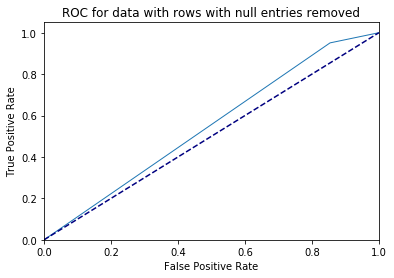

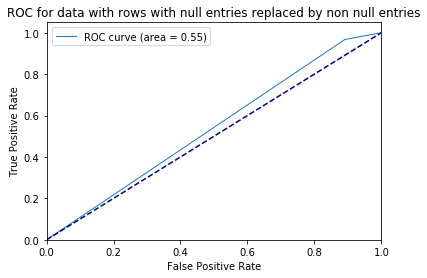

In [0]:
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries removed')

fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2_filled, predictions_filled)
roc_auc_2 = auc(fpr_2, tpr_2)
plt.figure()
plt.plot(fpr_2, tpr_2, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries replaced by non null entries')
plt.legend()
plt.show()

#### 2.2.2 Linear Regression

We then experiment with Linear regression classifier. The Linear regression classifier improves upon many of the metrics in comparision to the results we obtained with decision trees. A summary of the result is as follows: 
 

1.   Accuracy - The model acheives an accuracy of 94.80% on test data with null entries removed and acheives an accuracy of 96.76% on test data with null entries replaced by non null entries.
2. Precision Score - The model scores a precision score of .9480 on test data with rows with null entries removed and a score of .9676 on test data with null entries replaced by non null entries.
3. F1 Score - The model score an F1 score of .9733 on test data with rows with null entries removed and an F1 score of .9835 on test data with null entries replaced by non null entries.
4. Recall Score - The model score an F1 score of 1.0 on test data with rows with null entries removed and an F1 score of 1.0 on test data with null entries replaced by non null entries.


The confusion matrices and ROC Curves can be seen as below

In [0]:
from sklearn.linear_model import SGDClassifier
reg = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0)
reg = reg.fit(X_train_2, y_train_2)
predictions = reg.predict(X_test_2)

In [0]:
reg_2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0)
reg_2 = reg_2.fit(X_train_2_filled, y_train_2_filled)
predictions_filled = reg_2.predict(X_test_2_filled)

##### 2.2.2.1 Accuracy

In [0]:
lr_accuracy = metrics.accuracy_score(y_test_2, predictions)
lr_filled_accuracy = metrics.accuracy_score(y_test_2_filled, predictions_filled)
print('Accuracy for linear regression with rows with null entries removed is '+str(metrics.accuracy_score(y_test_2, predictions))) 
print('Accuracy for linear regression with rows with null entries replaced with non null entries is '+str(metrics.accuracy_score(y_test_2_filled, predictions_filled)))

Accuracy for linear regression with rows with null entries removed is 0.948051948051948
Accuracy for linear regression with rows with null entries replaced with non null entries is 0.9676660787771899


##### 2.2.2.2 Precision Score

In [0]:
lr_precision = metrics.precision_score(y_test_2, predictions)
lr_filled_precision = metrics.precision_score(y_test_2_filled, predictions_filled)
print('Precision Score for linear regression with rows with null entries removed is '+str(metrics.precision_score(y_test_2, predictions))) 
print('Precision Score for linear regression with rows with null entries replaced with non null entries is '+str(metrics.precision_score(y_test_2_filled, predictions_filled)))

Precision Score for linear regression with rows with null entries removed is 0.948051948051948
Precision Score for linear regression with rows with null entries replaced with non null entries is 0.9676660787771899


##### 2.2.2.3 F1 Score

In [0]:
lr_f1score = metrics.f1_score(y_test_2, predictions)
lr_filled_f1score = metrics.f1_score(y_test_2_filled, predictions_filled)
print('F1 Score for linear regression with rows with null entries removed is '+str(metrics.f1_score(y_test_2, predictions))) 
print('F1 Score for linear regression with rows with null entries replaced with non null entries is '+str(metrics.f1_score(y_test_2_filled, predictions_filled)))

F1 Score for linear regression with rows with null entries removed is 0.9733333333333333
F1 Score for linear regression with rows with null entries replaced with non null entries is 0.983567373767553


##### 2.2.2.4 Recall Score

In [0]:
lr_recall = metrics.recall_score(y_test_2, predictions)
lr_filled_recall = metrics.recall_score(y_test_2_filled, predictions_filled)
print('Recall Score for linear regression with rows with null entries removed is '+str(metrics.recall_score(y_test_2, predictions))) 
print('Recall Score for linear regression with rows with null entries replaced with non null entries is '+str(metrics.recall_score(y_test_2_filled, predictions_filled)))

Recall Score for linear regression with rows with null entries removed is 1.0
Recall Score for linear regression with rows with null entries replaced with non null entries is 1.0


##### 2.2.2.5 Confusion Matrix

In [0]:
print('Confusion Matrix for linear regression with rows with null entries removed is '+str(metrics.confusion_matrix(y_test_2, predictions))) 
print('Confusion Matrix for linear regression with rows with null entries replaced with non null entries is '+str(metrics.confusion_matrix(y_test_2_filled, predictions_filled)))

Confusion Matrix for linear regression with rows with null entries removed is [[  0  48]
 [  0 876]]
Confusion Matrix for linear regression with rows with null entries replaced with non null entries is [[   0  110]
 [   0 3292]]


##### 2.2.2.6 ROC Curves

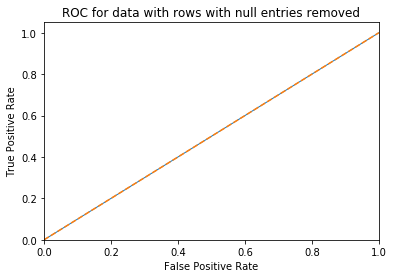

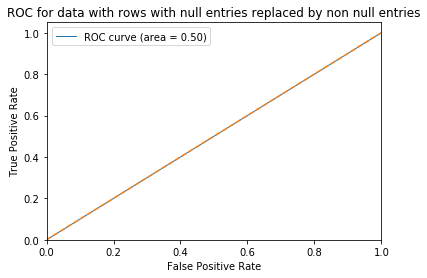

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries removed')

fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2_filled, predictions_filled)
roc_auc_2 = auc(fpr_2, tpr_2)
plt.figure()
plt.plot(fpr_2, tpr_2, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries replaced by non null entries')
plt.legend()
plt.show()

#### 2.2.3 Support Vector Machines (SVM's)

Finally, we create a support vector machine classifier. The SVM classifier performs better than the Linear regression classifier but the performace differences are very small. Still overall, the SVM classifier performs the best on this problem in most of the metrics.
 

1.   Accuracy - The model acheives an accuracy of 95.02% on test data with null entries removed and acheives an accuracy of 96.82% on test data with null entries replaced by non null entries.
2. Precision Score - The model scores a precision score of .9501 on test data with rows with null entries removed and a score of .9682 on test data with null entries replaced by non null entries.
3. F1 Score - The model score an F1 score of .9744 on test data with rows with null entries removed and an F1 score of .9838 on test data with null entries replaced by non null entries.
4. Recall Score - The model score an F1 score of 1.0 on test data with rows with null entries removed and an F1 score of 1.0 on test data with null entries replaced by non null entries.


The confusion matrices and ROC Curves can be seen as below

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf = clf.fit(X_train_2, y_train_2)
predictions = clf.predict(X_test_2)

In [0]:
clf_2 = SVC(gamma='auto')
clf_2 = clf_2.fit(X_train_2_filled, y_train_2_filled)
predictions_filled = clf_2.predict(X_test_2_filled)

##### 2.2.3.1 Accuracy

In [0]:
svm_accuracy = metrics.accuracy_score(y_test_2, predictions)
svm_filled_accuracy = metrics.accuracy_score(y_test_2_filled, predictions_filled)
print('Accuracy for SVM with rows with null entries removed is '+str(metrics.accuracy_score(y_test_2, predictions))) 
print('Accuracy for SVM with rows with null entries replaced with non null entries is '+str(metrics.accuracy_score(y_test_2_filled, predictions_filled)))

Accuracy for SVM with rows with null entries removed is 0.9502164502164502
Accuracy for SVM with rows with null entries replaced with non null entries is 0.9682539682539683


##### 2.2.3.2 Precision Score

In [0]:
svm_precision = metrics.precision_score(y_test_2, predictions)
svm_filled_precision = metrics.precision_score(y_test_2_filled, predictions_filled)
print('Precision Score for SVM with rows with null entries removed is '+str(metrics.precision_score(y_test_2, predictions))) 
print('Precision Score for SVM with rows with null entries replaced with non null entries is '+str(metrics.precision_score(y_test_2_filled, predictions_filled)))

Precision Score for SVM with rows with null entries removed is 0.9501084598698482
Precision Score for SVM with rows with null entries replaced with non null entries is 0.9682352941176471


##### 2.2.3.3 F1 Score

In [0]:
svm_f1score = metrics.f1_score(y_test_2, predictions)
svm_filled_f1score = metrics.f1_score(y_test_2_filled, predictions_filled)
print('F1 Score for SVM with rows with null entries removed is '+str(metrics.f1_score(y_test_2, predictions))) 
print('F1 Score for SVM with rows with null entries replaced with non null entries is '+str(metrics.f1_score(y_test_2_filled, predictions_filled)))

F1 Score for SVM with rows with null entries removed is 0.9744160177975528
F1 Score for SVM with rows with null entries replaced with non null entries is 0.9838613269575612


##### 2.2.3.4 Recall Score

In [0]:
svm_recall = metrics.recall_score(y_test_2, predictions)
svm_filled_recall = metrics.recall_score(y_test_2_filled, predictions_filled)
print('Recall Score for SVM with rows with null entries removed is '+str(metrics.recall_score(y_test_2, predictions))) 
print('Recall Score for SVM with rows with null entries replaced with non null entries is '+str(metrics.recall_score(y_test_2_filled, predictions_filled)))

Recall Score for SVM with rows with null entries removed is 1.0
Recall Score for SVM with rows with null entries replaced with non null entries is 1.0


##### 2.2.3.5 Confusion Matrix

In [0]:
print('Confusion Matrix for SVM with rows with null entries removed is '+str(metrics.confusion_matrix(y_test_2, predictions))) 
print('Confusion Matrix for SVM with rows with null entries replaced with non null entries is '+str(metrics.confusion_matrix(y_test_2_filled, predictions_filled)))

Confusion Matrix for SVM with rows with null entries removed is [[  2  46]
 [  0 876]]
Confusion Matrix for SVM with rows with null entries replaced with non null entries is [[   2  108]
 [   0 3292]]


##### 2.2.3.6 ROC Curves

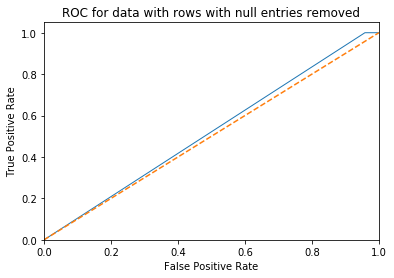

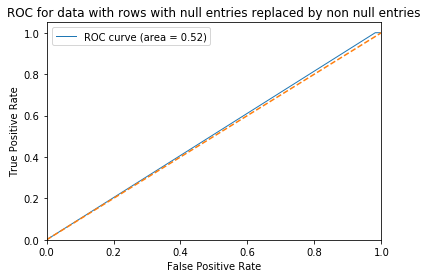

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries removed')

fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2_filled, predictions_filled)
roc_auc_2 = auc(fpr_2, tpr_2)
plt.figure()
plt.plot(fpr_2, tpr_2, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for data with rows with null entries replaced by non null entries')
plt.legend()
plt.show()

#### 2.2.4 Summary

Below are the plots comparing the performance across various metrics for the three models. 

##### 2.2.4.1 Accuracy

As we can see, all the three models perform quite well with the SVM's and linear regression models slightly edging out the decision trees. The SVM's perform slightly better than the linear regression model. The models trained on filled data perform slightly better although this time, the difference is not that much for accuracy.

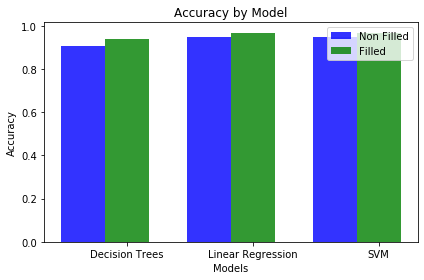

In [0]:
import numpy as np
n_groups = 3
non_filled_performances = (dtree_accuracy, lr_accuracy, svm_accuracy)
filled_performances = (dtree_filled_accuracy, lr_filled_accuracy, svm_filled_accuracy)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, non_filled_performances, bar_width,
alpha=opacity,
color='b',
label='Non Filled')

rects2 = plt.bar(index + bar_width, filled_performances, bar_width,
alpha=opacity,
color='g',
label='Filled')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(index + bar_width, ('Decision Trees', 'Linear Regression', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()


##### 2.2.4.2 Precision

All the 3 models perform relatively the same for precision metric. The difference between the precision of models trained on filled and non filled data is also very close for all the three models although the models trained on filled data slightly edge out the models trained with missing data removed

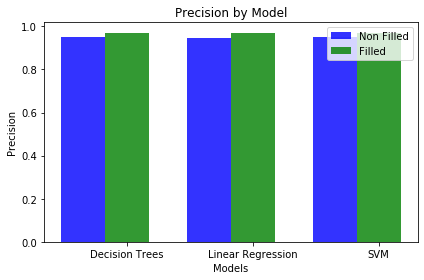

In [0]:
import numpy as np
n_groups = 3
non_filled_performances = (dtree_precision, lr_precision, svm_precision)
filled_performances = (dtree_filled_precision, lr_filled_precision, svm_filled_precision)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, non_filled_performances, bar_width,
alpha=opacity,
color='b',
label='Non Filled')

rects2 = plt.bar(index + bar_width, filled_performances, bar_width,
alpha=opacity,
color='g',
label='Filled')

plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision by Model')
plt.xticks(index + bar_width, ('Decision Trees', 'Linear Regression', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()


##### 2.2.4.3 F1 Score

The results here are again in line with the performances of the other models with linear regression and SVM models performing better than the decision trees. The difference between their individual performances doesn't vary by a lot and a similar trend is also observed for models trained on filled and non filled data with their performances varying slightly and the filled data performing slightly better.

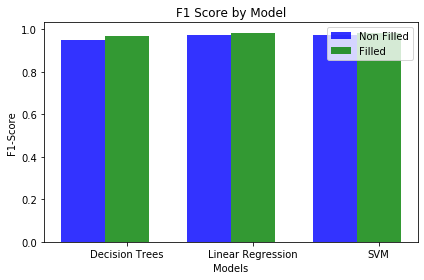

In [0]:
import numpy as np
n_groups = 3
non_filled_performances = (dtree_f1score, lr_f1score, svm_f1score)
filled_performances = (dtree_filled_f1score, lr_filled_f1score, svm_filled_f1score)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, non_filled_performances, bar_width,
alpha=opacity,
color='b',
label='Non Filled')

rects2 = plt.bar(index + bar_width, filled_performances, bar_width,
alpha=opacity,
color='g',
label='Filled')

plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1 Score by Model')
plt.xticks(index + bar_width, ('Decision Trees', 'Linear Regression', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()


##### 2.2.4.4 Recall

All the three models have the same recall and the value of recall is also the same regardless of the data being filled or non filled which was used for training.

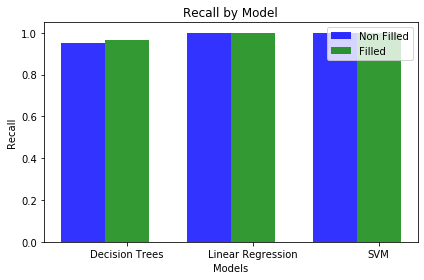

In [0]:
import numpy as np
n_groups = 3
non_filled_performances = (dtree_recall, lr_recall, svm_recall)
filled_performances = (dtree_filled_recall, lr_filled_recall, svm_filled_recall)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, non_filled_performances, bar_width,
alpha=opacity,
color='b',
label='Non Filled')

rects2 = plt.bar(index + bar_width, filled_performances, bar_width,
alpha=opacity,
color='g',
label='Filled')

plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall by Model')
plt.xticks(index + bar_width, ('Decision Trees', 'Linear Regression', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()


### 2.3 Clustering Models

This is the last problem we try to solve where we try to discover some associations among the apps with similar ratings. This area falls under the category of unsupervised learning where we use algorithms like k-means to discover patterns in the data. In this part, we first use the k-means algorithm to see if there is any pattern which occurs in all in highly rated or lowly rated apps. If any useful information is discovered, we can then use it to guide the developers build better apps.

After doing some data cleaning, the data ends up having 19 columns. Since plotting a graph with 19 axes will be almost impossible to comprehend, we perform dimension reduction here. We reduce the dimensions from 19 to 2 using pricipal component analysis (PCA). After reducing the dataset to just one attribute which should have the properties of all the 19 attributes, we perform the KMeans algorithm.

KMeans algorithm works by looking at the nearest neighbors and then based on the neighbors, it assigns a class to the points. When we create a KMeans object in Scikit learn, we are asked to specify the number of clusters we want the algorithm to find. Since we have 5 ratings, we choose 5 for the number of clusters. We then plot the results obtained from Kmeans and the algorithm clearly finds 5 different classes. Due to the PCA, we lost a lot of information and it is hard to comprehend the results now to infer on what particular attribute(s), the KMeans algorithm saperated the data, although we can still see that 5 clear categories exist in the data.

In [0]:
kmeans_data=data_X = data.drop(['URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)
kmeans_data_Y = kmeans_data['Average User Rating']
kmeans_data_X = pd.concat([kmeans_data.get(['User Rating Count','Price','Size', 'Average User Rating']),
                           pd.get_dummies(kmeans_data['Primary Genre'], prefix='Primary Genre')],axis=1)
print(kmeans_data_X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 5 to 16932
Data columns (total 20 columns):
User Rating Count                  4618 non-null float64
Price                              4618 non-null float64
Size                               4618 non-null float64
Average User Rating                4618 non-null float64
Primary Genre_Book                 4618 non-null uint8
Primary Genre_Business             4618 non-null uint8
Primary Genre_Education            4618 non-null uint8
Primary Genre_Entertainment        4618 non-null uint8
Primary Genre_Finance              4618 non-null uint8
Primary Genre_Games                4618 non-null uint8
Primary Genre_Health & Fitness     4618 non-null uint8
Primary Genre_Lifestyle            4618 non-null uint8
Primary Genre_Medical              4618 non-null uint8
Primary Genre_News                 4618 non-null uint8
Primary Genre_Productivity         4618 non-null uint8
Primary Genre_Reference            4618 non-null uint8
Prim

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(kmeans_data_X)
pca_2d = pca.transform(kmeans_data_X)

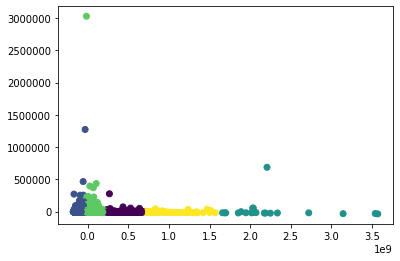

In [0]:
import pylab as pl
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=111)
kmeans.fit(kmeans_data_X)
pl.figure('K-means with 5 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
#pl.plot(pca_2d[:, 0], pca_2d[:, 1])
pl.show()

### 2.4 Logisitic Regression Coefficients Study

Using logistic regression, we train models which can use the given features to predict the values of a given feature. Logistic Regression models are first trained over a given dataset using an algorithm like gradient descent. Gradient Descent finds coefficients for each of the given features. These features can then be rated using the coefficients which were obtained by training the logistic regression model. The coefficients of the features which are larger in magnitude contribute more to the overall prediction of a given attribute and the features with it's coefficient which are smaller contribute much lesser. We can thus compare the importance of various features by comparing the magnitudes of the coefficients of the features. It is important to use just the magnitude of the coefficient and not it's value while rating. We are more concerned with the value of the coefficient since the sign only tells us if a change in the coefficient will increase or decrease the value of the variable to be predicted but the magnitude tells us by how much the predicted variable will be affected.

Another important thing to keep in mind while doing a logistic regression coefficients study is that the various features should have values which are comparable. In our study, not all the features are comparable but as a part of the study, we ignore this for now and try to compare the results for the two different cases of data, one where the rows having null values are removed and one where the rows with null entries are replaced by non null entries.

In [0]:
data_Y = data['Average User Rating']
data_X = data.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)

In [0]:
data_Y_filled = data_filled['Average User Rating']
data_X_filled = data_filled.drop(['Average User Rating', 'URL', 'ID', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Name'], axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X = pd.concat([data_X.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
# convert Primary Genre from object to One hot encoded values
data_X_filled = pd.concat([data_X_filled.get(['User Rating Count','Price','Size']),
                           pd.get_dummies(data_X_filled['Primary Genre'], prefix='Primary Genre')],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.25, random_state=42)

X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(data_X_filled, data_Y_filled, test_size=0.25, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X_train, y_train)
reg1 = reg1.fit(X_train, y_train)
predictions = reg1.predict(X_test)

reg2 = LinearRegression().fit(X_train_filled, y_train_filled)
reg = reg2.fit(X_train_filled, y_train_filled)
predictions = reg2.predict(X_test_filled)

In [0]:
coefficients1 = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(reg1.coef_)})
coefficients2 = pd.DataFrame({"Feature":X_train_filled.columns,"Coefficients":np.transpose(reg2.coef_)})

In [0]:
coefficients1['Coefficients'] = coefficients1['Coefficients'].abs()
coefficients2['Coefficients'] = coefficients2['Coefficients'].abs()

print(coefficients1.sort_values(by='Coefficients', ascending=False))
print(coefficients2.sort_values(by='Coefficients', ascending=False))

                            Feature  Coefficients
4            Primary Genre_Business  1.737528e+00
14          Primary Genre_Reference  9.154556e-01
12               Primary Genre_News  7.678795e-01
9    Primary Genre_Health & Fitness  7.653980e-01
11            Primary Genre_Medical  7.271944e-01
3                Primary Genre_Book  5.207128e-01
18          Primary Genre_Utilities  4.679596e-01
16             Primary Genre_Sports  4.496027e-01
13       Primary Genre_Productivity  4.448510e-01
8               Primary Genre_Games  4.240188e-01
6       Primary Genre_Entertainment  2.507832e-01
7             Primary Genre_Finance  1.876829e-01
5           Primary Genre_Education  2.412887e-02
10          Primary Genre_Lifestyle  1.512036e-02
1                             Price  3.670129e-04
0                 User Rating Count  4.127325e-07
2                              Size  7.219988e-11
15  Primary Genre_Social Networking  5.551115e-17
17             Primary Genre_Travel  0.000000e+00


As we can see, we're getting quite different results for the 2 different datasets. The top 3 attributes for both the datasets are different. For the data with null entries removed, the top 3 attributes are:



1.   Primary_Genre_Business
2.   Primary_Genre_Reference
3.   Primary_Genre_News

The top 3 attributes for rows with null entries replaced by non null entries are 



1.   Primary_Genre_Medical
2.   Primary_Genre_Music
3.   Primary_Genre_Shopping

What stays consistent though is that the top attributes in both the datasets are coming from the genre category. After Genre, the next most important feature in both the datasets is Price, which means that Price contributes quite a lot to predicting the average rating of an app. This is an interesting learning since this means that the single most important attribute after the genre to which the app belongs to which contributes the most to the rating of an app is the price.





## Sources

1. https://www.businessofapps.com/data/app-revenues/

2. https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games